<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The Data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Table of Contents
1. [The Data](#The-Data)
2. [Popular Movie Duration in the 1990s](#Popular-Movie-Duration-in-the-1990s)
3. [Short Action Movies in the 90s](#Short-Action-Movies-in-the-90s)
4. [Top Genres of the Decade](#Top-Genres-of-the-Decade)
5. [Comedy Runtime Trends](#Comedy-Runtime-Trends)
6. [Movie Duration Distribution](#Movie-Duration-Distribution)
7. [Country & Director Analysis](#Country-&-Director-Analysis)
8. [Movie Production by Country](#Movie-Production-by-Country)
9. [Most Active Director](#Most-Active-Director)
10.[TV Shows Added Post-2015](#TV-Shows-Added-Post-2015)

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [47]:
movies_90s = (netflix_df["release_year"] >= 1990) & (netflix_df["release_year"] < 2000)


## Popular Movie Duration in the 1990s
We want to see which movies in the 1990s had the most common duration and how they were spread over the years.

In [44]:
time = netflix_df['duration'].mode()[0]

popular_movies= netflix_df[(movies_90s) & (netflix_df['duration'] == time)]
popular_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
606,s902,Movie,Big Daddy,Dennis Dugan,"Adam Sandler, Joey Lauren Adams, Jon Stewart, ...",United States,"October 1, 2020",1999,93,Dumped by his girlfriend because he refuses to...,Comedies
2356,s3772,Movie,Love on Delivery,Stephen Chow,"Stephen Chow, Christy Chung, Ng Man-Tat",Hong Kong,"August 16, 2018",1994,93,"To prove himself to a love interest, a deliver...",Action
4078,s6557,Movie,The Last Days of Chez Nous,Gillian Armstrong,"Lisa Harrow, Bruno Ganz, Kerry Fox, Miranda Ot...",Australia,"November 1, 2016",1992,93,Successful writer Beth's tepid marriage and ho...,Classic Movies
4495,s7231,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",1991,93,"This drama tells the tale of Ricky Bell, a pro...",Dramas
4597,s7415,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,"October 1, 2011",1991,93,A beauty pageant winner is stalked by a serial...,Dramas


Now let't visulaize the the movies with the most frequent duriation by release_year

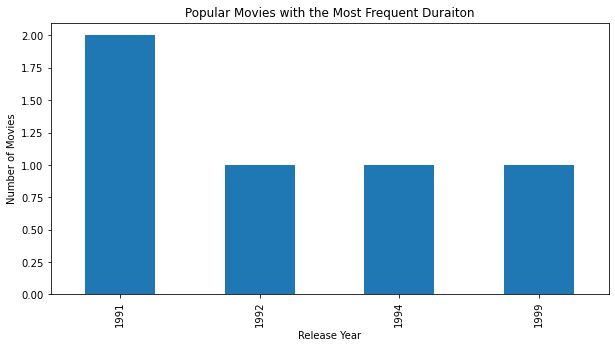

In [45]:
plt.figure(figsize=(10, 5))
popular_movies['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Popular Movies with the Most Frequent Duraiton")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()

Lets disply the top 5 rows

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## Short Action Movies in the 90s
How many Action movies were under 90 minutes?

In [5]:
action_movies = (movies_90s) & (netflix_df["genre"] == "Action")
short_movie_count = netflix_df.loc[action_movies & (netflix_df["duration"] < 90)].shape[0]
print(f"There were a total of {short_movie_count} short action movies in the 1990's")

There were a total of 7 short action movies in the 1990's


## Top Genres of the Decade
Let’s see which genres dominated the 1990s.

In [6]:
genre_90s = netflix_df[movies_90s]["genre"].value_counts()
print(genre_90s)

Action            48
Dramas            44
Comedies          40
Classic Movies    15
Children          15
Stand-Up           8
Thrillers          5
Horror Movies      4
Cult Movies        2
Documentaries      2
Docuseries         1
Name: genre, dtype: int64


Bar Chart Top 10 Genre's

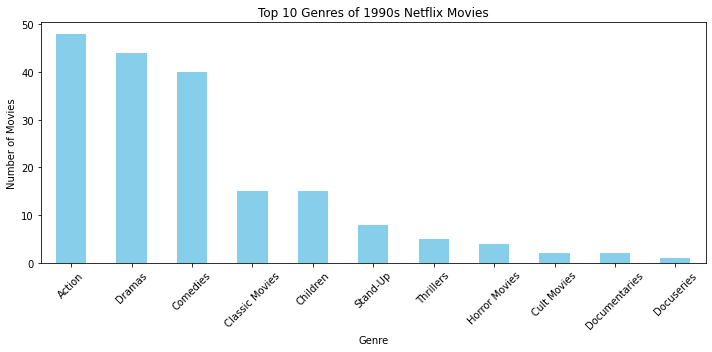

In [46]:
plt.figure(figsize=(10, 5))
genre_90s.plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres of 1990s Netflix Movies")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comedy Runtime Trends
What was the average duration of comedies?

In [21]:
import numpy as np
comedy_duration = (movies_90s) & (netflix_df["genre"]=="Comedies")
avg_comedy_duration = np.mean(netflix_df.loc[comedy_duration, "duration"])
print(f" Average duration of 1990's comedies: {avg_comedy_duration:.1f} minutes")

 Average duration of 1990's comedies: 110.7 minutes


## Movie Duration Distribution

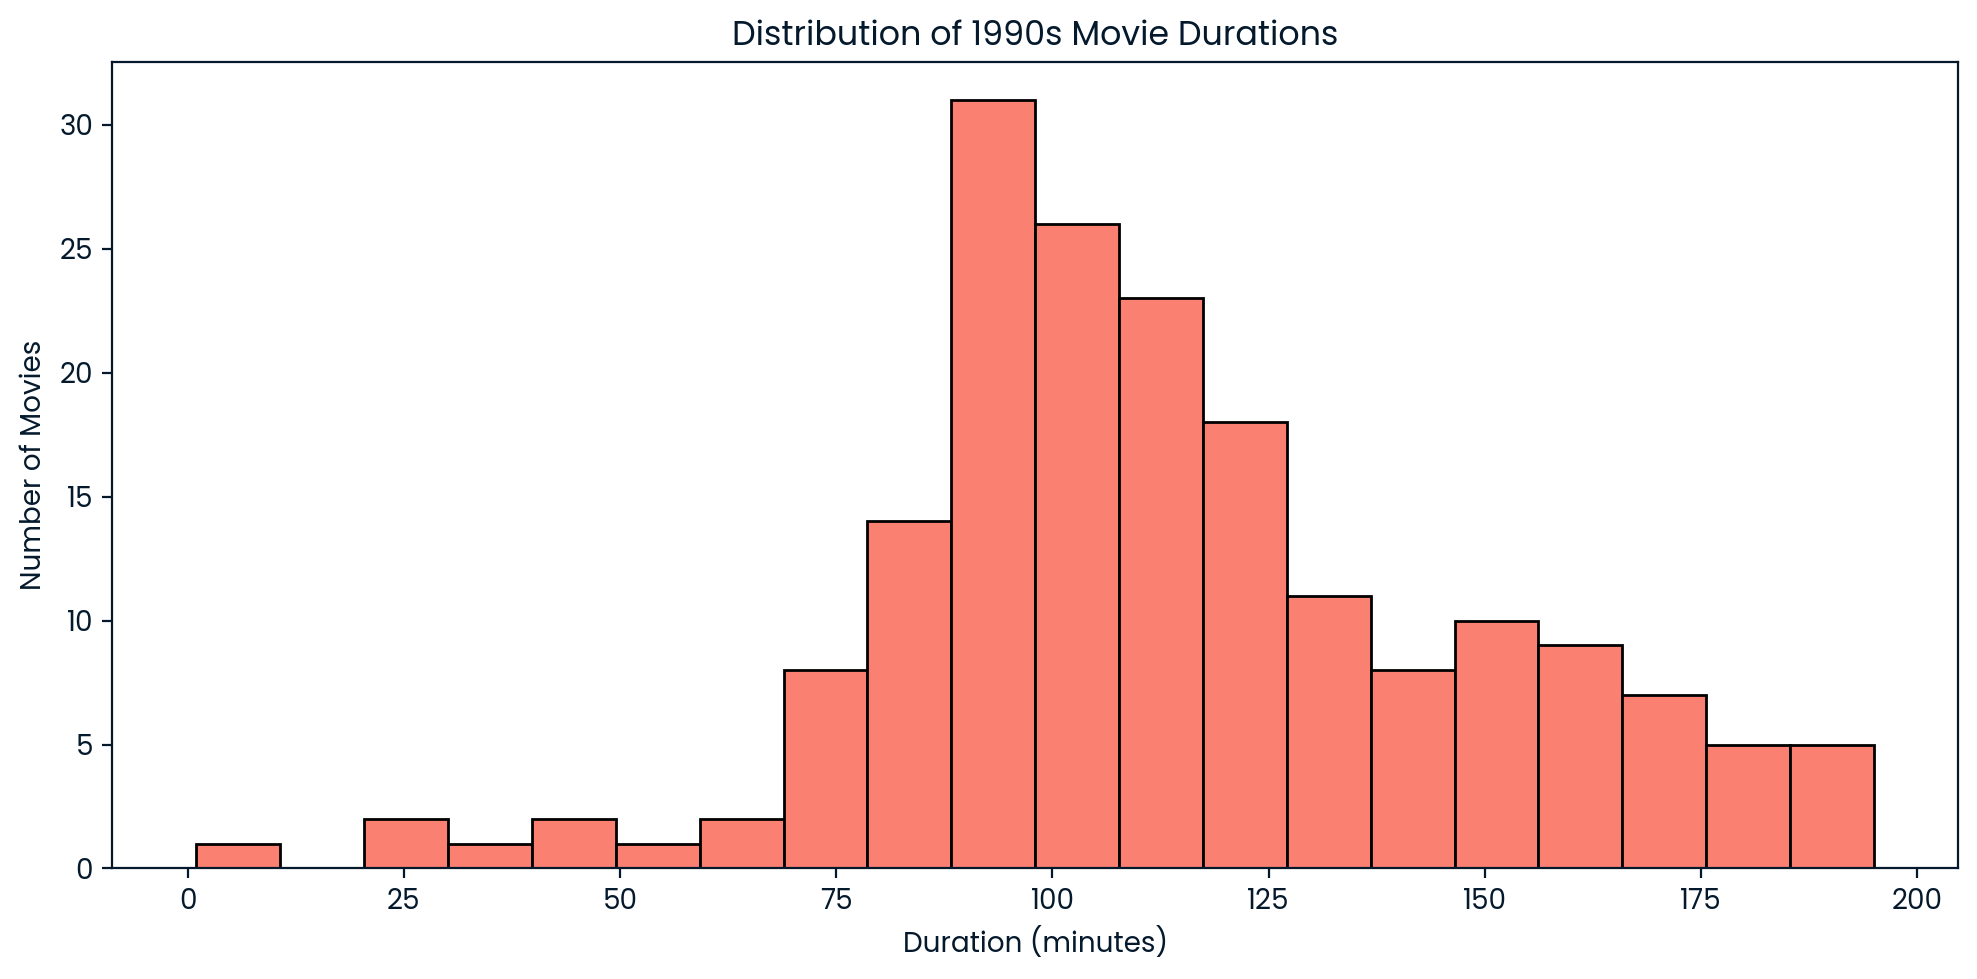

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(netflix_df.loc[movies_90s, "duration"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution of 1990s Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

## Country & Director Analysis
How many movies from the U.S. in the 1990s?

In [26]:
us_90s = (movies_90s) & (netflix_df["country"]=="United States")
us_90s_count = us_90s.sum()
print(f"There were: {us_90s_count} movies released in the 1990s")

There were: 100 movies released in the 1990s


## Movie Production by Country

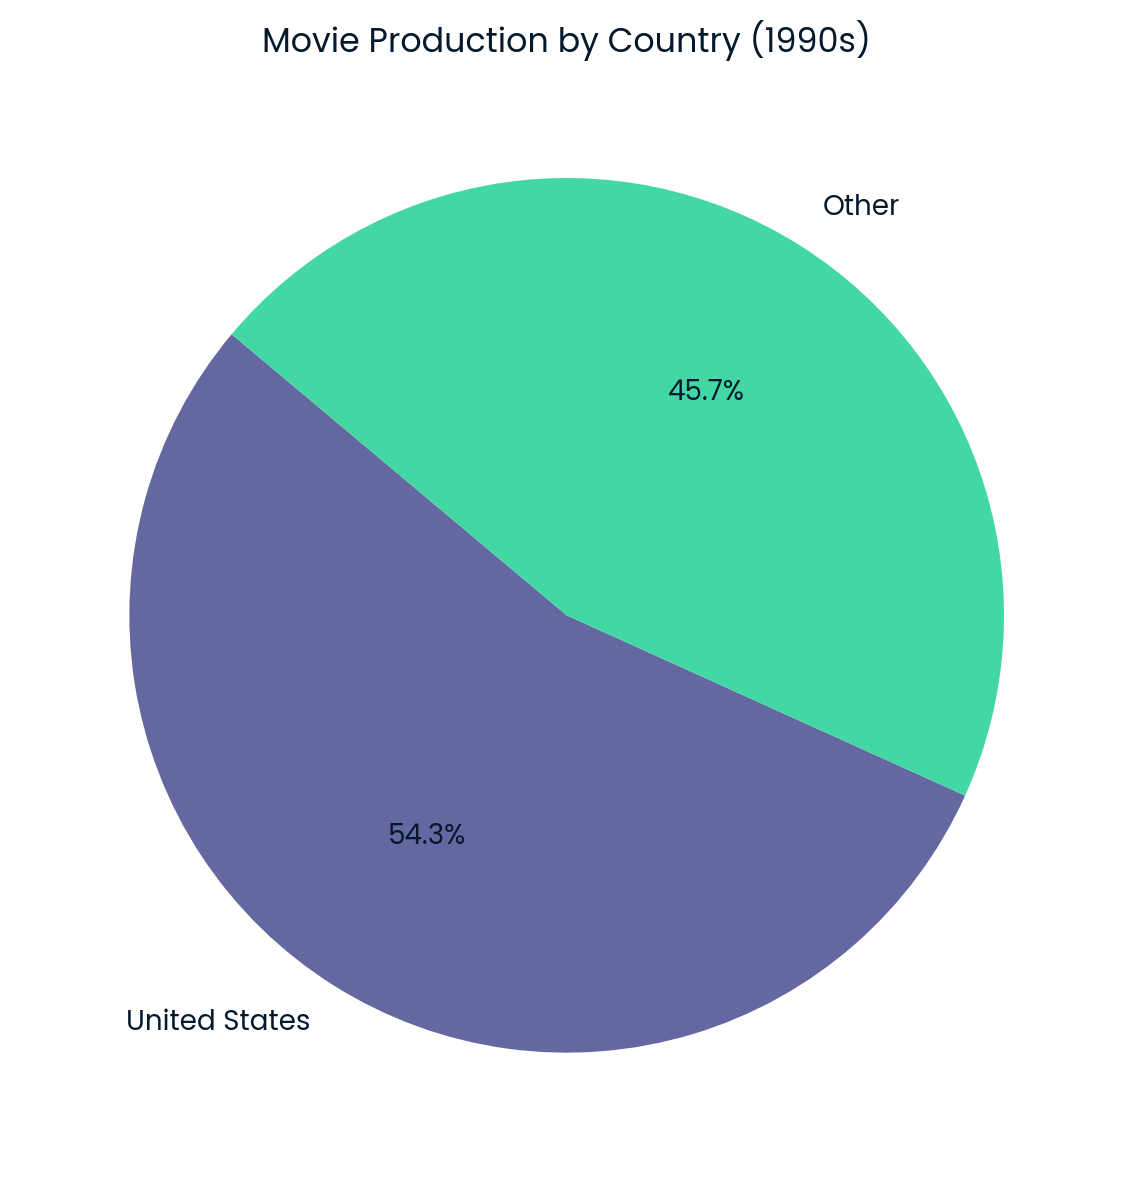

In [32]:
country_counts = netflix_df.loc[movies_90s, "country"].value_counts()
top_countries = country_counts.head(1)
others = country_counts[1:].sum()

labels = list(top_countries.index) + ["Other"]
sizes = list(top_countries.values) + [others]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Movie Production by Country (1990s)")
plt.tight_layout()
plt.show()

## Most Active Director
Which director had the most movies released in the 1990s?

In [45]:
director_90s = netflix_df[movies_90s]["director"].mode()
print(director_90s)

0    Johnnie To
Name: director, dtype: object


## TV Shows Added Post-2015
How many “TV Shows” were added to Netflix after 2015?

In [49]:
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"])
tv_shows = (netflix_df["type"]=="TV Show") & (netflix_df["release_year"]>2015)
netflix_df.loc[tv_shows, "date_added"].dt.year.value_counts().sort_index()

2013     1
2016     1
2017    15
2018    13
2019    22
2020    50
2021     2
Name: date_added, dtype: int64

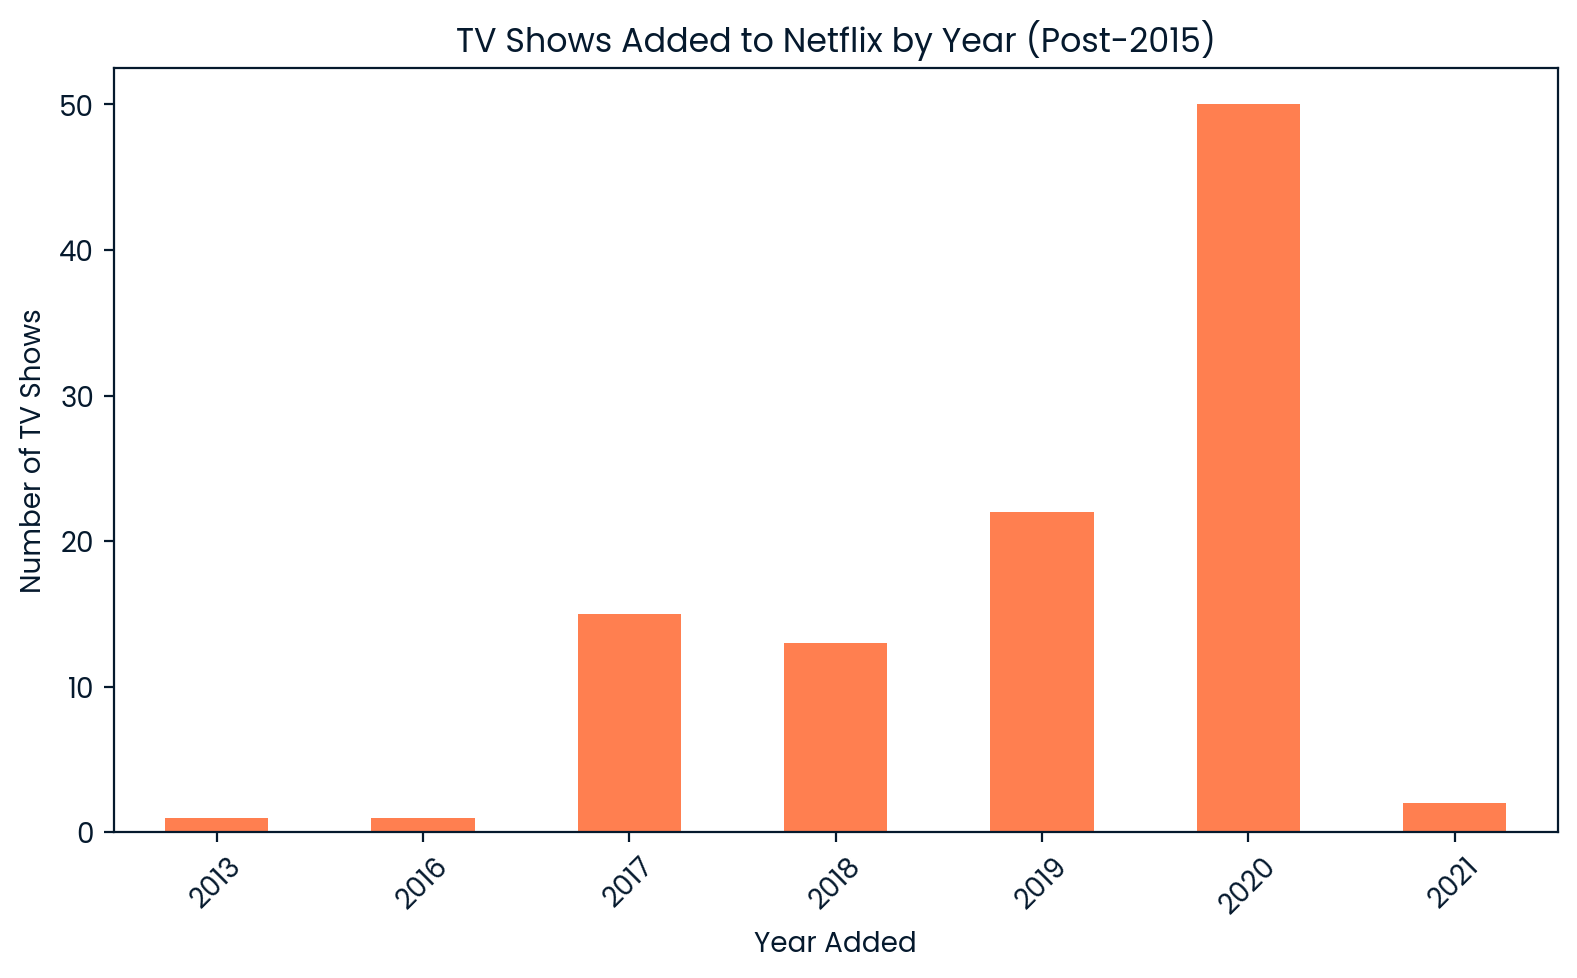

In [50]:
tv_added = netflix_df.loc[tv_shows, "date_added"].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 5))
tv_added.plot(kind="bar", color="coral")
plt.title("TV Shows Added to Netflix by Year (Post-2015)")
plt.xlabel("Year Added")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()